In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
transactions = pd.read_csv('transaction_data.csv')
customer_behavior = pd.read_csv('purchase_behaviour.csv')



In [3]:
# Data Preprocessing
# Merge datasets
merged_data = pd.merge(transactions, customer_behavior, on='LYLTY_CARD_NBR', how='left')

# Calculate product profitability
product_profitability = merged_data.groupby('PROD_NAME').agg({
    'TOT_SALES': 'sum',
    'PROD_QTY': 'sum'
}).reset_index()

product_profitability['profit_per_unit'] = product_profitability['TOT_SALES'] / product_profitability['PROD_QTY']
product_profitability = product_profitability.sort_values('TOT_SALES', ascending=False)


In [4]:
# Top 3 Most Profitable Products
top_3_products = product_profitability.head(3)
print("Top 3 Most Profitable Products:")
print(top_3_products)


Top 3 Most Profitable Products:
                                   PROD_NAME  TOT_SALES  PROD_QTY  \
11          Dorito Corn Chp     Supreme 380g    40352.0      6509   
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6      6164   
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2      6106   

    profit_per_unit  
11         6.199416  
86         5.900000  
77         5.700000  


In [5]:
# Customer Loyalty Analysis
# Group by customer segments
customer_segments = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES': ['sum', 'mean'],
    'LYLTY_CARD_NBR': 'count'
}).reset_index()
customer_segments.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOTAL_SALES', 'AVG_SALES', 'CUSTOMER_COUNT']
customer_segments = customer_segments.sort_values('TOTAL_SALES', ascending=False)

print("\nCustomer Segments Analysis:")
print(customer_segments)



Customer Segments Analysis:
                 LIFESTAGE PREMIUM_CUSTOMER  TOTAL_SALES  AVG_SALES  \
6           OLDER FAMILIES           Budget    168363.25   7.269570   
19   YOUNG SINGLES/COUPLES       Mainstream    157621.60   7.558339   
13                RETIREES       Mainstream    155677.05   7.252262   
15          YOUNG FAMILIES           Budget    139345.85   7.287201   
9    OLDER SINGLES/COUPLES           Budget    136769.80   7.430315   
10   OLDER SINGLES/COUPLES       Mainstream    133393.80   7.282116   
11   OLDER SINGLES/COUPLES          Premium    132263.15   7.449766   
12                RETIREES           Budget    113147.80   7.443445   
7           OLDER FAMILIES       Mainstream    103445.55   7.262395   
14                RETIREES          Premium     97646.05   7.456174   
16          YOUNG FAMILIES       Mainstream     92788.75   7.189025   
1   MIDAGE SINGLES/COUPLES       Mainstream     90803.85   7.647284   
17          YOUNG FAMILIES          Premium     

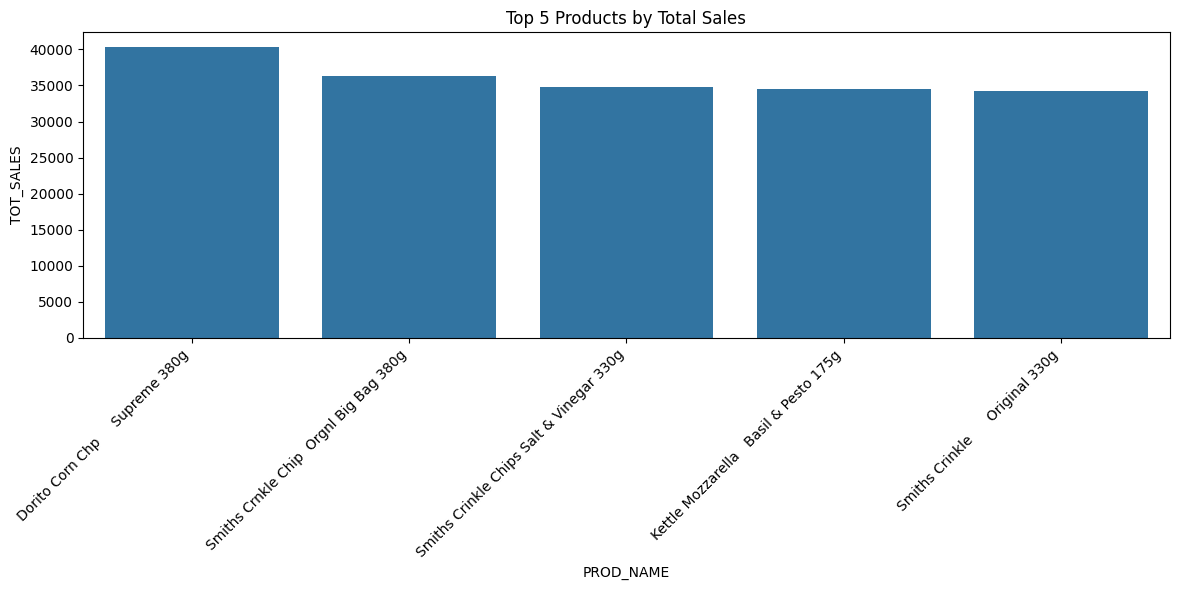

In [6]:
# Visualization of Product Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='PROD_NAME', y='TOT_SALES', data=product_profitability.head(5))
plt.title('Top 5 Products by Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('product_sales.png')


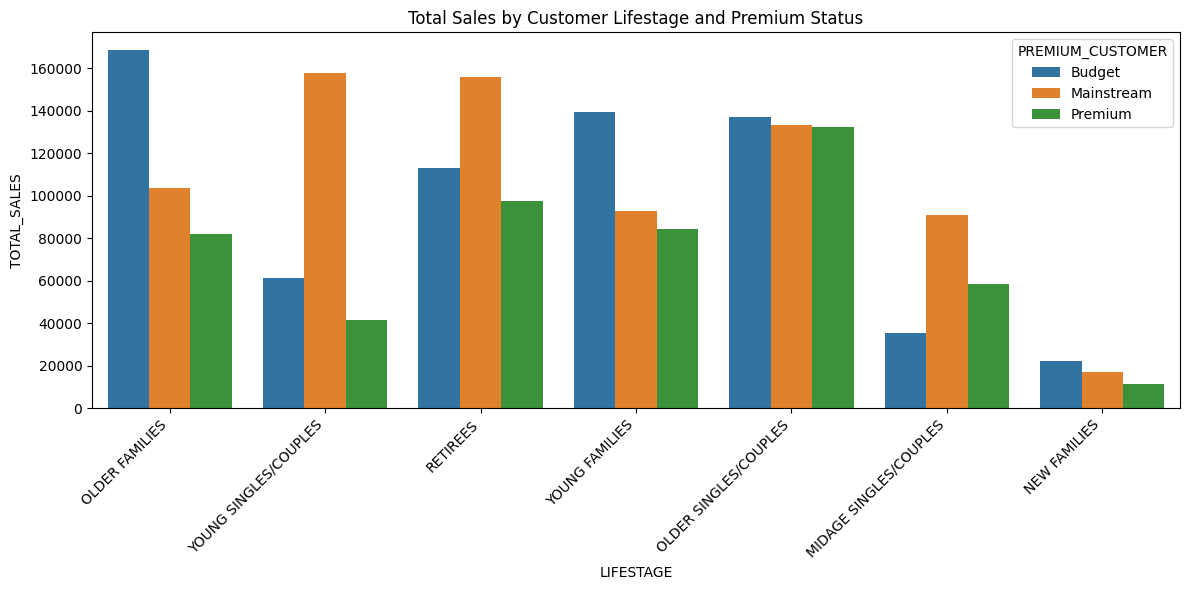

In [7]:
# Visualization of Customer Segments
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOTAL_SALES', hue='PREMIUM_CUSTOMER', data=customer_segments)
plt.title('Total Sales by Customer Lifestage and Premium Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('customer_segments.png')